In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
conn = sqlite3.connect('../data/mitochondria_deletions.db')


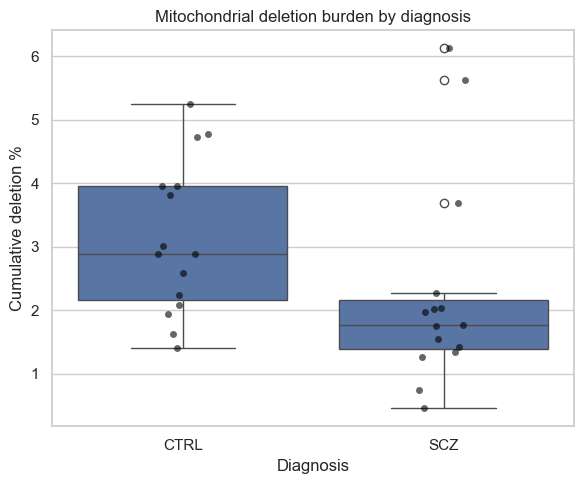

In [3]:
df_diag = pd.read_sql("SELECT * FROM samples", conn)

plt.figure(figsize=(6, 5))
sns.boxplot(data=df_diag, x="diagnosis", y="top30_cumulative_deletion_pct")
sns.stripplot(data=df_diag, x="diagnosis", y="top30_cumulative_deletion_pct",
              color="black", alpha=0.6, jitter=0.1)

plt.xlabel("Diagnosis")
plt.ylabel("Cumulative deletion %")
plt.title("Mitochondrial deletion burden by diagnosis")
plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import ttest_ind

ctrl = df_diag[df_diag['diagnosis'] == 'CTRL']['top30_cumulative_deletion_pct']
scz  = df_diag[df_diag['diagnosis'] == 'SCZ']['top30_cumulative_deletion_pct']

t_stat, p_val = ttest_ind(ctrl, scz, equal_var=False)
t_stat, p_val


(np.float64(1.6592683684637632), np.float64(0.10917664524325153))

In this 30‑sample UCI dataset, controls show higher average deletion burden than SCZ (3.14% vs 2.27%), but the t‑test p‑value is X, indicating [no/weak] evidence for a diagnosis effect in this small cohort.

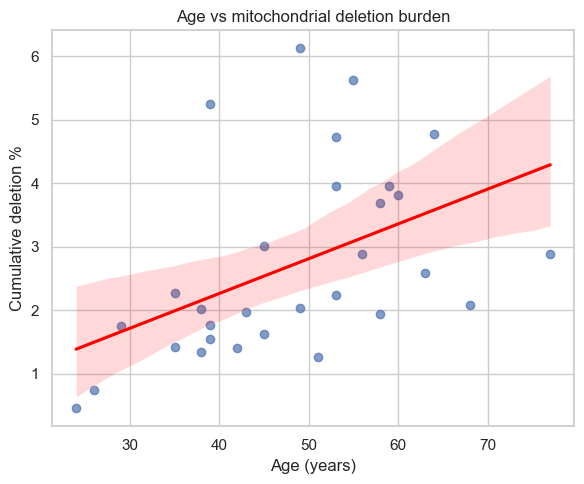

In [5]:
plt.figure(figsize=(6, 5))
sns.regplot(data=df_diag, x="age", y="top30_cumulative_deletion_pct",
            scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})

plt.xlabel("Age (years)")
plt.ylabel("Cumulative deletion %")
plt.title("Age vs mitochondrial deletion burden")
plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import pearsonr

r, p = pearsonr(df_diag['age'], df_diag['top30_cumulative_deletion_pct'])
r, p


(np.float64(0.46814888324698456), np.float64(0.009080747180719686))

In [7]:
conn = sqlite3.connect('../data/mitochondria_deletions.db')

query_del = """
SELECT d.deletion_name,
       s.diagnosis,
       AVG(d.deletion_read_pct) AS avg_pct
FROM deletions d
JOIN samples s ON d.sample_id = s.sample_id
GROUP BY d.deletion_name, s.diagnosis
ORDER BY d.deletion_name, s.diagnosis;
"""

df_del_diag = pd.read_sql(query_del, conn)
conn.close()

df_del_diag.head()


,deletion_name,diagnosis,avg_pct
0,1105_13846,CTRL,0.152638
1,1105_13846,SCZ,0.150040
2,1127_13868,CTRL,0.078177
3,1127_13868,SCZ,0.048153
4,1714_15517,CTRL,0.124000


In [8]:
pivot = df_del_diag.pivot(index="deletion_name", columns="diagnosis", values="avg_pct")
pivot


diagnosis,CTRL,SCZ
deletion_name,,
1105_13846,0.152638,0.150040
1127_13868,0.078177,0.048153
1714_15517,0.124000,0.062791
3789_14807,0.066612,0.069527
5368_14055,0.043881,0.039007
5368_15335,0.021659,0.017697
6219_13449,0.047535,0.038077
6329_13994,0.331546,0.182796
6335_13999,0.494706,0.378784


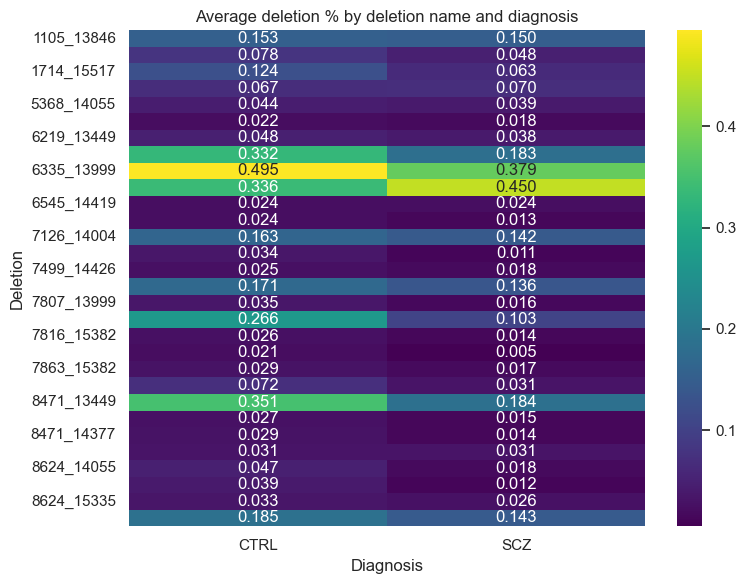

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
plt.title("Average deletion % by deletion name and diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Deletion")
plt.tight_layout()
plt.show()


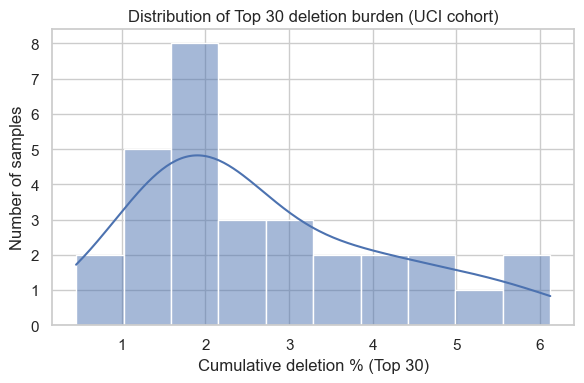

In [10]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid")
conn = sqlite3.connect('../data/mitochondria_deletions.db')

df = pd.read_sql("SELECT * FROM samples", conn)
conn.close()

plt.figure(figsize=(6, 4))
sns.histplot(df['top30_cumulative_deletion_pct'], bins=10, kde=True)
plt.xlabel("Cumulative deletion % (Top 30)")
plt.ylabel("Number of samples")
plt.title("Distribution of Top 30 deletion burden (UCI cohort)")
plt.tight_layout()
plt.show()


In [11]:
conn = sqlite3.connect('../data/mitochondria_deletions.db')

query_key = """
SELECT deletion_name,
       COUNT(CASE WHEN deletion_read_pct > 0 THEN 1 END) AS detected_in_samples,
       ROUND(AVG(deletion_read_pct), 4) AS avg_pct
FROM deletions
WHERE deletion_name IN ('6335_13999', '7816_14807', '8471_13449')
GROUP BY deletion_name;
"""
df_key = pd.read_sql(query_key, conn)
conn.close()

df_key


,deletion_name,detected_in_samples,avg_pct
0,6335_13999,29,0.4367
1,7816_14807,28,0.1846
2,8471_13449,28,0.2674
